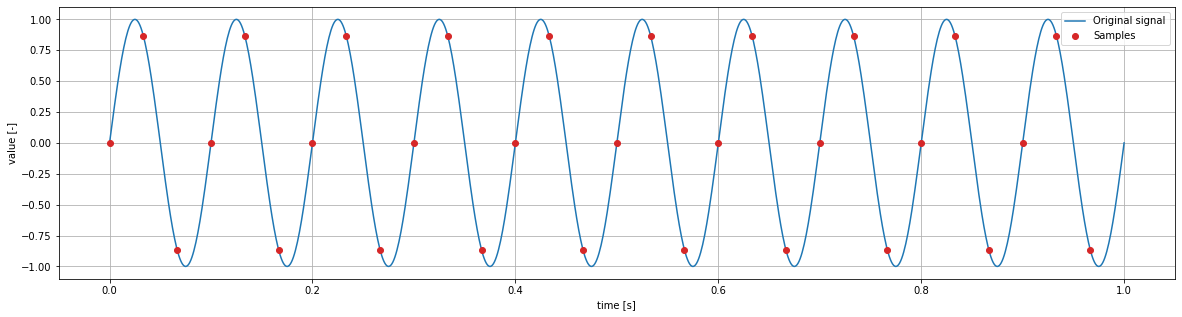

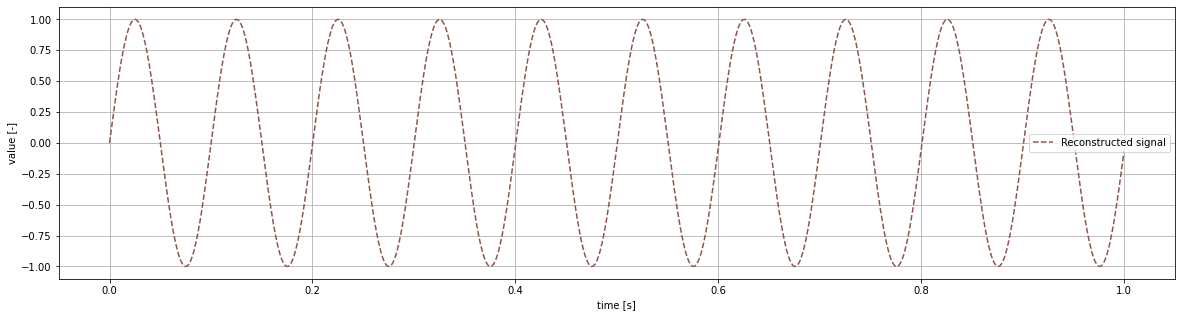

In [36]:
from scipy.signal import resample
import numpy
import matplotlib.pyplot as plt

f = 10 # Hz
f_s = 30 # Hz

time = numpy.linspace(0, 1, 1000)
signal = numpy.sin(2 * numpy.pi * f * time)

samples_moments = numpy.arange(0, 1, 1 / f_s)
signal_samples = numpy.sin(2 * numpy.pi * f * samples_moments)

reconstructed_signal = resample(signal_samples, len(time))

plt.figure(figsize=(20, 5))
plt.plot(time, signal, label='Original signal')
plt.plot(samples_moments, signal_samples, 'C3o', label='Samples')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('value [-]')
plt.grid(True)

plt.figure(figsize=(20, 5))
plt.plot(time, reconstructed_signal, 'C5--', label='Reconstructed signal')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('value [-]')
plt.grid(True)

 Original signal : [10 20 30 40 50 60]
 Reconstructed signal : [11.79 18.01 28.78 41.22 51.99 58.21]
 Mean absolute error : 1.67


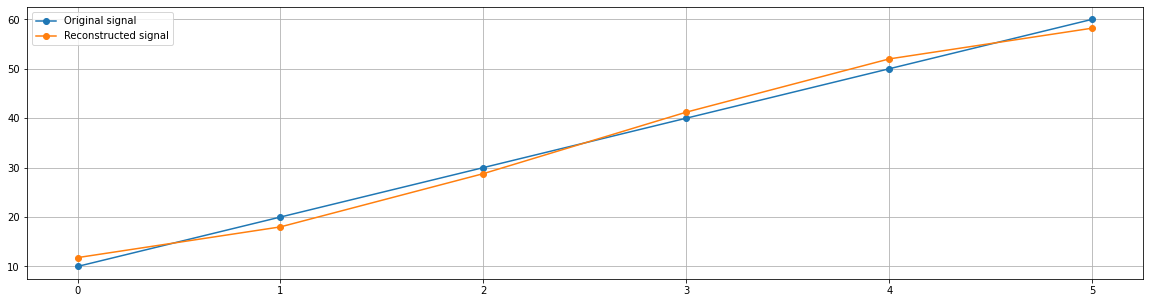

In [46]:
from scipy.fftpack import dct , idct

def apply_dct(signal):
    return dct(signal, norm ='ortho')

def reconstruct_signal(dct_signal, threshold):
    dct_signal[ numpy.abs(dct_signal) < threshold ] = 0
    return idct(dct_signal, norm ='ortho')

original_signal = numpy.array([10, 20, 30, 40, 50, 60])

dct_signal = apply_dct(original_signal)
reconstructed_signal = reconstruct_signal(dct_signal, threshold = 15)

print (" Original signal :", original_signal )
print (" Reconstructed signal :", numpy.round(reconstructed_signal, 2))
print (" Mean absolute error :", numpy.round(numpy.average(numpy.abs(original_signal - reconstructed_signal)), 2))

t = numpy.arange(len(original_signal))
plt.figure(figsize=(20, 5))
plt.plot(t, original_signal, 'o-', label='Original signal')
plt.plot(t, reconstructed_signal, 'o-', label='Reconstructed signal')
plt.legend()
plt.grid(True)